In [1]:
# Change Python path
import os, sys
os.chdir("/LOCALDATA/ARTHURs_FILES/Codigos/")
print(os.getcwd())
sys.path.append('python_modules')

# Enables modules autoreload (important during development)
%load_ext autoreload
%autoreload 2

/LOCALDATA/ARTHURs_FILES/Codigos


In [ ]:
# Loading CMEMS-MFC dataset
from data_managers.load_save_cmems_mfc import load_cmems_mfc

ds_cmems_mfc = load_cmems_mfc(
    # years=range(2009, 2010),
    # lon_selector=slice(-1, 5),
    # lat_selector=slice(37.7, 41)
    region_selector="balears",
)

ds_cmems_mfc

In [ ]:
# Loading CMEMS-MFC dataset only for bottom
from data_managers.load_save_cmems_mfc import load_cmems_mfc

ds_cmems_mfc_bot = load_cmems_mfc(
    # years=range(2009, 2010),
    # lon_selector=slice(-1, 5),
    # lat_selector=slice(37.7, 41)
    region_selector="balears",
    only_botT=True
)

ds_cmems_mfc_bot.coords

Loaded CMEMS-MFC dataset.


<xarray.Dataset> Size: 605MB
Dimensions:  (time: 13118, lat: 80, lon: 144)
Coordinates:
  * lat      (lat) float32 320B 37.69 37.73 37.77 37.81 ... 40.9 40.94 40.98
  * lon      (lon) float32 576B -0.875 -0.8333 -0.7917 -0.75 ... 5.0 5.042 5.083
  * time     (time) datetime64[ns] 105kB 1987-01-01 1987-01-02 ... 2022-12-31
Data variables:
    bottomT  (time, lat, lon) float32 604MB dask.array<chunksize=(1, 80, 144), meta=np.ndarray>
Attributes:
    title:          Potential Temperature (3D) - Daily Mean
    field_type:     daily_mean_centered_at_time_field
    source:         MFS E3R1
    institution:    Centro Euro-Mediterraneo sui Cambiamenti Climatici - CMCC...
    contact:        servicedesk.cmems@mercator-ocean.eu
    references:     Please check in CMEMS catalogue the INFO section for prod...
    comment:        Please check in CMEMS catalogue the INFO section for prod...
    Conventions:    CF-1.0
    bulletin_date:  20200901
    bulletin_type:  reanalysis
    history:        Tue Apr  8 14:50:31 2025: ncrcat TEMP_MEDSEA_MULTIYEAR_PH...
    NCO:            netCDF Operators version 5.0.6 (Homepage = http://nco.sf....

## Computing bottom MHWs

In [ ]:
from mhws_computers.mhw_computer import compute_mhw_maps_apply_ufunc
from data_managers.load_save_mhws import save_mhws_dataset

clim_period = (1987, 2021)

ds_mhws = compute_mhw_maps_apply_ufunc(
    ds_cmems_mfc_bot,
    using_dataset="mfc_botT",
    var_name="bottomT",
    clim_period=clim_period
)

# Computing the dataset and saving it into nc_file
ds_mhws = save_mhws_dataset(
    ds_mhws,
    dataset_used="mfc_botT",
    clim_period=clim_period,
    region="balears",
    progress_bar=True,
    profilers=True
)

ds_mhws

Saving MHWs dataset to /LOCALDATA/ARTHURs_FILES/Codigos/../Datos/mhws/mfc_botT_mhws_balears_1987_2021.nc
[########################################] | 100% Completed | 92m 17s
 -> Saved!


<xarray.Dataset> Size: 60MB
Dimensions:               (lon: 144, lat: 80, year: 36)
Coordinates:
  * lon                   (lon) float32 576B -0.875 -0.8333 ... 5.042 5.083
  * lat                   (lat) float32 320B 37.69 37.73 37.77 ... 40.94 40.98
  * year                  (year) int64 288B 1987 1988 1989 ... 2020 2021 2022
Data variables: (12/18)
    count                 (lat, lon, year) float64 3MB 0.0 0.0 0.0 ... 5.0 7.0
    total_days            (lat, lon, year) float64 3MB 0.0 0.0 ... 50.0 172.0
    moderate_days         (lat, lon, year) float64 3MB 0.0 0.0 ... 50.0 170.0
    strong_days           (lat, lon, year) float64 3MB 0.0 0.0 0.0 ... 0.0 0.0
    severe_days           (lat, lon, year) float64 3MB 0.0 0.0 0.0 ... 0.0 0.0
    extreme_days          (lat, lon, year) float64 3MB 0.0 0.0 0.0 ... 0.0 0.0
    ...                    ...
    duration              (lat, lon, year) float64 3MB nan nan ... 10.0 24.57
    rate_onset            (lat, lon, year) float64 3MB nan nan ... 0.001037
    rate_decline          (lat, lon, year) float64 3MB nan nan ... 0.0007593
    temp_min              (lat, lon, year) float64 3MB nan nan ... 12.88 12.91
    temp_mean             (lat, lon, year) float64 3MB nan nan ... 12.92 12.93
    temp_max              (lat, lon, year) float64 3MB nan nan ... 12.94 12.94
Attributes:
    climatologyPeriod:  1987-2021
    description:        MHWs yearly statistics computed using the marineHeatW...

## Computing bottom-1 MHWs

In [ ]:
from data_managers.load_save_basics import load_bathy

ds_bathy = load_bathy(source="MFC", drop_vars=[], region_selector="balears")
ds_bathy.coords

Loaded MFC bathymetry dataset.


Coordinates:
  * lat      (lat) float32 320B 37.69 37.73 37.77 37.81 ... 40.9 40.94 40.98
  * lon      (lon) float32 576B -0.875 -0.8333 -0.7917 -0.75 ... 5.0 5.042 5.083

In [33]:
print(ds_bathy)

<xarray.Dataset> Size: 93kB
Dimensions:     (lat: 80, lon: 144)
Coordinates:
  * lat         (lat) float32 320B 37.69 37.73 37.77 37.81 ... 40.9 40.94 40.98
  * lon         (lon) float32 576B -0.875 -0.8333 -0.7917 ... 5.0 5.042 5.083
Data variables:
    depth       (lat, lon) float32 46kB ...
    deptho_lev  (lat, lon) float32 46kB ...
Attributes:
    Conventions:  CF-1.0
    history:      Tue Apr  8 10:17:39 2025: ncks -F -d longitude,120,276 -d l...
    NCO:          netCDF Operators version 5.0.6 (Homepage = http://nco.sf.ne...


In [ ]:
import xarray as xr
import numpy as np

# Use same coordinates for both
da_deptho_lev = ds_bathy.deptho_lev.assign_coords(lat=ds_cmems_mfc.T.lat, lon=ds_cmems_mfc.T.lon)

# Fill NaNs for indexing, but remember which were NaN
valid_mask = ~np.isnan(da_deptho_lev)
depth_indices = da_deptho_lev.fillna(0).astype(int) - 2  # penultimate index

# Broadcast to (time, lat, lon)
_, depth_indices_broadcast = xr.broadcast(ds_cmems_mfc.T.time, depth_indices)

# This gives the temperatures at the penultimate depth
da_T_mfc_bot_m1 = ds_cmems_mfc.T.isel(depth=depth_indices_broadcast)

# Step 5: Set proper depth coordinate (2D only: lat, lon) from original depth values
# Use da_deptho_lev - 2 to find the actual depth value
depth_vals = ds_cmems_mfc.depth[depth_indices]  # depth_indices is (lat, lon)

# Assign this 2D depth as coordinate
da_T_mfc_bot_m1 = da_T_mfc_bot_m1.assign_coords(depth=depth_vals)

# Restore NaNs where deptho_lev was invalid
da_T_mfc_bot_m1["depth"] = da_T_mfc_bot_m1["depth"].where(valid_mask)
da_T_mfc_bot_m1.coords


Coordinates:
    depth    (lat, lon) float32 46kB nan nan nan ... 2.63e+03 2.63e+03 2.562e+03
  * lat      (lat) float32 320B 37.69 37.73 37.77 37.81 ... 40.9 40.94 40.98
  * lon      (lon) float32 576B -0.875 -0.8333 -0.7917 -0.75 ... 5.0 5.042 5.083
  * time     (time) datetime64[ns] 105kB 1987-01-01 1987-01-02 ... 2022-12-31

In [30]:
da_T_mfc_bot_m1.isel(time=0).sel(lon=1,lat=41, method='nearest').compute()

<xarray.DataArray 'T' ()> Size: 4B
array(14.581418, dtype=float32)
Coordinates:
    depth    float32 4B 56.33
    lat      float32 4B 40.98
    lon      float32 4B 1.0
    time     datetime64[ns] 8B 1987-01-01
Attributes:
    units:          degrees_C
    standard_name:  sea_water_potential_temperature
    long_name:      potential temperature
    valid_min:      1.0
    valid_max:      40.0
    cell_methods:   time: mean
    unit:           °C

In [ ]:
da_T_mfc_bot_m1.depth.groupby("time")

In [ ]:
from mhws_computers.mhw_computer import compute_mhw_yearly
from data_managers.load_save_mhws import save_mhws_dataset

clim_period = (1987, 2021)

da_sub = da_T_mfc_bot_m1#.sel(lon=slice(1.5, 2.5), lat=slice(39.2, 40))

ds_mhws = compute_mhw_yearly(
    da_sub,
    using_dataset = "cmems_mfc",
    clim_period = clim_period
)

# Computing the dataset and saving it into nc_file
ds_mhws = save_mhws_dataset(
    ds_mhws,
    dataset_used = "mfc_bot_m1",
    clim_period = clim_period,
    region = "balears",
    progress_bar = True,
    profilers = True
)


ds_mhws

Saving MHWs dataset to /LOCALDATA/ARTHURs_FILES/Codigos/../Datos/mhws/mfc_bot_m1_mhws_sa_dragonera_1987_2021.nc
[########################################] | 100% Completed | 533.69 s
 -> Saved!


<xarray.Dataset> Size: 2MB
Dimensions:               (lon: 25, lat: 19, year: 36)
Coordinates:
  * lon                   (lon) float32 100B 1.5 1.542 1.583 ... 2.417 2.458 2.5
  * lat                   (lat) float32 76B 39.23 39.27 39.31 ... 39.94 39.98
    depth                 (lat, lon) float32 2kB 434.5 453.3 ... 1.397e+03
  * year                  (year) int64 288B 1987 1988 1989 ... 2020 2021 2022
Data variables: (12/18)
    count                 (lat, lon, year) float64 137kB 0.0 0.0 0.0 ... 3.0 1.0
    total_days            (lat, lon, year) float64 137kB 0.0 0.0 ... 319.0 186.0
    moderate_days         (lat, lon, year) float64 137kB 0.0 0.0 ... 319.0 138.0
    strong_days           (lat, lon, year) float64 137kB 0.0 0.0 ... 0.0 48.0
    severe_days           (lat, lon, year) float64 137kB 0.0 0.0 0.0 ... 0.0 0.0
    extreme_days          (lat, lon, year) float64 137kB 0.0 0.0 0.0 ... 0.0 0.0
    ...                    ...
    duration              (lat, lon, year) float64 137kB nan nan ... 106.3 186.0
    rate_onset            (lat, lon, year) float64 137kB nan nan ... 0.0009888
    rate_decline          (lat, lon, year) float64 137kB nan nan ... 0.001438
    temp_min              (lat, lon, year) float64 137kB 12.91 12.88 ... 12.94
    temp_mean             (lat, lon, year) float64 137kB 12.96 12.93 ... 12.99
    temp_max              (lat, lon, year) float64 137kB 13.05 12.99 ... 13.09
Attributes:
    climatologyPeriod:  1987-2021
    description:        MHWs yearly statistics computed using the marineHeatW...
    acknowledgment:     Generated using E.U. Copernicus Marine Service Inform...

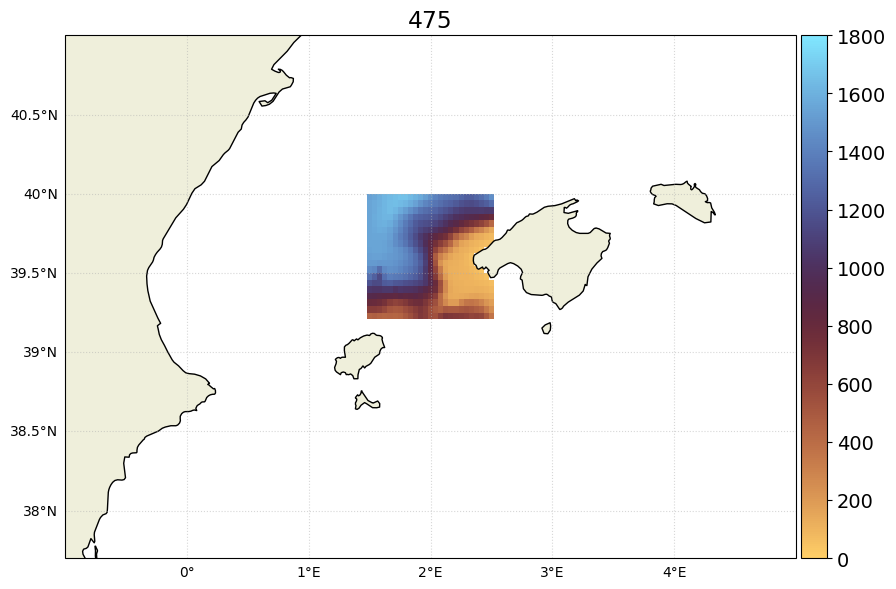

In [41]:
from data_plotters.basic_plotting import plot_map

ds = ds_bathy.sel(lon=slice(1.5, 2.5), lat=slice(39.2, 40))

plot_map(
    ds.lon, ds.lat,
    ds.depth,
    title=ds.depth.size
)

In [38]:
da_sub

<xarray.DataArray 'T' (time: 13118, lat: 2, lon: 2)> Size: 210kB
dask.array<getitem, shape=(13118, 2, 2), dtype=float32, chunksize=(2538, 2, 2), chunktype=numpy.ndarray>
Coordinates:
    depth    (lat, lon) float32 16B 61.52 66.95 33.77 51.38
  * lat      (lat) float32 8B 38.52 38.56
  * lon      (lon) float32 8B -0.04167 1.439e-13
  * time     (time) datetime64[ns] 105kB 1987-01-01 1987-01-02 ... 2022-12-31
Attributes:
    units:          degrees_C
    standard_name:  sea_water_potential_temperature
    long_name:      potential temperature
    valid_min:      1.0
    valid_max:      40.0
    cell_methods:   time: mean
    unit:           °C

In [37]:
ds_mhws.compute()

<xarray.Dataset> Size: 21kB
Dimensions:               (lon: 2, lat: 2, year: 36)
Coordinates:
  * lon                   (lon) float32 8B -0.04167 1.439e-13
  * lat                   (lat) float32 8B 38.52 38.56
    depth                 (lat, lon) float32 16B 61.52 66.95 33.77 51.38
  * year                  (year) int64 288B 1987 1988 1989 ... 2020 2021 2022
Data variables: (12/18)
    count                 (lat, lon, year) float64 1kB 1.0 2.0 3.0 ... 0.0 3.0
    total_days            (lat, lon, year) float64 1kB 12.0 13.0 ... 0.0 54.0
    moderate_days         (lat, lon, year) float64 1kB 12.0 7.0 ... 0.0 54.0
    strong_days           (lat, lon, year) float64 1kB 0.0 4.0 3.0 ... 0.0 0.0
    severe_days           (lat, lon, year) float64 1kB 0.0 2.0 4.0 ... 0.0 0.0
    extreme_days          (lat, lon, year) float64 1kB 0.0 0.0 12.0 ... 0.0 0.0
    ...                    ...
    duration              (lat, lon, year) float64 1kB 12.0 6.5 ... nan 18.0
    rate_onset            (lat, lon, year) float64 1kB 0.739 0.6971 ... 0.07697
    rate_decline          (lat, lon, year) float64 1kB 0.1768 0.5845 ... 0.04165
    temp_min              (lat, lon, year) float64 1kB 13.45 13.74 ... 14.38
    temp_mean             (lat, lon, year) float64 1kB 14.61 14.96 ... 15.16
    temp_max              (lat, lon, year) float64 1kB 19.49 18.25 ... 17.75
Attributes:
    climatologyPeriod:  1987-2021
    description:        MHWs yearly statistics computed using the marineHeatW...
    acknowledgment:     Generated using E.U. Copernicus Marine Service Inform...

## TESTS

In [ ]:
ds_cmems_mfc_bot

<xarray.Dataset> Size: 605MB
Dimensions:  (time: 13118, lat: 80, lon: 144)
Coordinates:
  * lat      (lat) float32 320B 37.69 37.73 37.77 37.81 ... 40.9 40.94 40.98
  * lon      (lon) float32 576B -0.875 -0.8333 -0.7917 -0.75 ... 5.0 5.042 5.083
  * time     (time) datetime64[ns] 105kB 1987-01-01 1987-01-02 ... 2022-12-31
Data variables:
    bottomT  (time, lat, lon) float32 604MB dask.array<chunksize=(1, 80, 144), meta=np.ndarray>
Attributes:
    title:          Potential Temperature (3D) - Daily Mean
    field_type:     daily_mean_centered_at_time_field
    source:         MFS E3R1
    institution:    Centro Euro-Mediterraneo sui Cambiamenti Climatici - CMCC...
    contact:        servicedesk.cmems@mercator-ocean.eu
    references:     Please check in CMEMS catalogue the INFO section for prod...
    comment:        Please check in CMEMS catalogue the INFO section for prod...
    Conventions:    CF-1.0
    bulletin_date:  20200901
    bulletin_type:  reanalysis
    history:        Tue Apr  8 14:50:31 2025: ncrcat TEMP_MEDSEA_MULTIYEAR_PH...
    NCO:            netCDF Operators version 5.0.6 (Homepage = http://nco.sf....

In [ ]:
import pandas as pd
pd.date_range("1987-01-01", "2022-12-31", freq="1D")

DatetimeIndex(['1987-01-01', '1987-01-02', '1987-01-03', '1987-01-04',
               '1987-01-05', '1987-01-06', '1987-01-07', '1987-01-08',
               '1987-01-09', '1987-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=13514, freq='D')

In [ ]:
ds_cmems_mfc_bot.sel(time=slice("2001-12-1", "2002-01-1"))

<xarray.Dataset> Size: 47kB
Dimensions:  (time: 1, lat: 80, lon: 144)
Coordinates:
  * lat      (lat) float32 320B 37.69 37.73 37.77 37.81 ... 40.9 40.94 40.98
  * lon      (lon) float32 576B -0.875 -0.8333 -0.7917 -0.75 ... 5.0 5.042 5.083
  * time     (time) datetime64[ns] 8B 2002-01-01
Data variables:
    bottomT  (time, lat, lon) float32 46kB dask.array<chunksize=(1, 80, 144), meta=np.ndarray>
Attributes:
    title:          Potential Temperature (3D) - Daily Mean
    field_type:     daily_mean_centered_at_time_field
    source:         MFS E3R1
    institution:    Centro Euro-Mediterraneo sui Cambiamenti Climatici - CMCC...
    contact:        servicedesk.cmems@mercator-ocean.eu
    references:     Please check in CMEMS catalogue the INFO section for prod...
    comment:        Please check in CMEMS catalogue the INFO section for prod...
    Conventions:    CF-1.0
    bulletin_date:  20200901
    bulletin_type:  reanalysis
    history:        Tue Apr  8 14:50:31 2025: ncrcat TEMP_MEDSEA_MULTIYEAR_PH...
    NCO:            netCDF Operators version 5.0.6 (Homepage = http://nco.sf....

In [ ]:
import mhws_computers.marineHeatWaves as mhw
import numpy as np

for i in range(100):
    lon = np.random.choice(ds_cmems_mfc_bot.lon)
    lat = np.random.choice(ds_cmems_mfc_bot.lat)

    print(f"Doing for {lon:.2f}, {lat:.2f}...")

    ds = ds_cmems_mfc_bot.sel(lon=lon, lat=lat)
    print(f"Got time size of {ds.time.size}")

    t = ds.time.values.astype('datetime64[D]').astype(int) + 719163
    sst = ds.bottomT.values

    mhws, clim = mhw.detect(t, sst, climatologyPeriod=(1987, 2021))

    print(f"Done for {lon:.2f}, {lat:.2f}!")
    print()

In [ ]:
from datetime import date

mhw = {}
mhw['time_start'] = [date(1982, 12, 31).toordinal(),]
mhw['time_end'] = [date(1983, 12, 31).toordinal()]

def ordinal_time(year, month, day):
    return date(year, month, day).toordinal()

ev = 0

while ev < len(mhw['time_start']):
    year_start = date.fromordinal(mhw['time_start'][ev]).year
    year_end = date.fromordinal(mhw['time_end'][ev]).year
    
    if year_start < year_end:
        mhw['time_end'].insert(ev, ordinal_time(year_start, 12, 31))
        mhw['time_start'].insert(ev+1, ordinal_time(year_start+1, 1, 1))
    
    ev += 1

print(f"mhw['time_start'] : {mhw['time_start']}")
print(f"mhw['time_end'] : {mhw['time_end']}")
print(f"time_starts : {[date.fromordinal(time) for time in mhw['time_start']]}")
print(f"time_ends : {[date.fromordinal(time) for time in mhw['time_end']]}")
# print(f"time_starts : {time_starts}")
# print(f"time_ends : {time_ends}")
# print(f"time_starts : {[date.fromordinal(time) for time in time_starts]}")
# print(f"time_ends : {[date.fromordinal(time) for time in time_ends]}")

mhw['time_start'] : [723910, 723911]
mhw['time_end'] : [723910, 724275]
time_starts : [datetime.date(1982, 12, 31), datetime.date(1983, 1, 1)]
time_ends : [datetime.date(1982, 12, 31), datetime.date(1983, 12, 31)]


## Time series MHWs

In [26]:
from data_managers.load_save_basics import load_bathy

ds_bathy = load_bathy(source="mfc")
ds_bathy.sel(lon=2.292, lat=39.48, method='nearest').depth
ds_bathy.sel(lon=0.50, lat=39.31, method='nearest').depth.values
# ds_bathy.depth.where(ds_bathy.depth>100).where(ds_bathy.depth<200).plot()

Loaded MFC bathymetry dataset.


array(1261.0428, dtype=float32)

In [ ]:
from mhws_computers.mhw_computer import compute_mhw_ts

mhw_plat, clim_plat = compute_mhw_ts(
    ds_cmems_mfc.sel(lon=2.292, lat=39.48, depth=[0, 50, 99], method='nearest')
)

mhw_deep, clim_deep = compute_mhw_ts(
    ds_cmems_mfc.sel(lon=0.50, lat=39.31, depth=[0, 100, 200, 500, 1000, 1261], method='nearest')
)

In [28]:
# mhw_plat, clim_plat = compute_mhw_ts(
#     ds_cmems_mfc.sel(lon=2.292, lat=39.48, depth=0, method='nearest')
# )
mhw_plat.keys()

dict_keys(['time_start', 'time_end', 'time_peak', 'date_start', 'date_end', 'date_peak', 'index_start', 'index_end', 'index_peak', 'duration', 'duration_moderate', 'duration_strong', 'duration_severe', 'duration_extreme', 'intensity_max', 'intensity_mean', 'intensity_var', 'intensity_cumulative', 'intensity_max_relThresh', 'intensity_mean_relThresh', 'intensity_var_relThresh', 'intensity_cumulative_relThresh', 'intensity_max_abs', 'intensity_mean_abs', 'intensity_var_abs', 'intensity_cumulative_abs', 'category', 'rate_onset', 'rate_decline', 'n_events'])

In [34]:
[(['year'])] * 5 + [['time']]

[['year'], ['year'], ['year'], ['year'], ['year'], ['time']]

In [30]:
[['year']] * 5

[['year'], ['year'], ['year'], ['year'], ['year']]

In [42]:
{"a":1} | {"b":3}

{'a': 1, 'b': 3}

In [7]:
ds_2

<xarray.Dataset> Size: 210kB
Dimensions:  (time: 13118)
Coordinates:
    depth    float32 4B 1.018
    lat      float32 4B 39.48
    lon      float32 4B 2.292
  * time     (time) datetime64[ns] 105kB 1987-01-01 1987-01-02 ... 2022-12-31
Data variables:
    bottomT  (time) float32 52kB 15.13 15.14 15.03 14.92 ... 14.07 14.08 14.11
    T        (time) float32 52kB 15.71 15.68 15.61 15.55 ... 17.03 17.0 16.99
Attributes:
    title:          Potential Temperature (3D) - Daily Mean
    field_type:     daily_mean_centered_at_time_field
    source:         MFS E3R1
    institution:    Centro Euro-Mediterraneo sui Cambiamenti Climatici - CMCC...
    contact:        servicedesk.cmems@mercator-ocean.eu
    references:     Please check in CMEMS catalogue the INFO section for prod...
    comment:        Please check in CMEMS catalogue the INFO section for prod...
    Conventions:    CF-1.0
    bulletin_date:  20200901
    bulletin_type:  reanalysis
    history:        Tue Apr  8 14:50:31 2025: ncrcat TEMP_MEDSEA_MULTIYEAR_PH...
    NCO:            netCDF Operators version 5.0.6 (Homepage = http://nco.sf....

In [ ]:
import mhws_computers.marineHeatWaves as mhw

ds = ds_2

t = ds.time.values.astype('datetime64[D]').astype(int) + 719163
sst = ds.T.values

mhws, clim = mhw.detect(t, sst, climatologyPeriod=(1987, 2021))
print(mhws.keys())

for key in mhws.keys():
    print(f"{key}: {1 if isinstance(mhws[key], int) else len(mhws[key])}")

dict_keys(['time_start', 'time_end', 'time_peak', 'date_start', 'date_end', 'date_peak', 'index_start', 'index_end', 'index_peak', 'duration', 'duration_moderate', 'duration_strong', 'duration_severe', 'duration_extreme', 'intensity_max', 'intensity_mean', 'intensity_var', 'intensity_cumulative', 'intensity_max_relThresh', 'intensity_mean_relThresh', 'intensity_var_relThresh', 'intensity_cumulative_relThresh', 'intensity_max_abs', 'intensity_mean_abs', 'intensity_var_abs', 'intensity_cumulative_abs', 'category', 'rate_onset', 'rate_decline', 'n_events'])
time_start: 67
time_end: 67
time_peak: 67
date_start: 67
date_end: 67
date_peak: 67
index_start: 67
index_end: 67
index_peak: 67
duration: 67
duration_moderate: 67
duration_strong: 67
duration_severe: 67
duration_extreme: 67
intensity_max: 67
intensity_mean: 67
intensity_var: 67
intensity_cumulative: 67
intensity_max_relThresh: 67
intensity_mean_relThresh: 67
intensity_var_relThresh: 67
intensity_cumulative_relThresh: 67
intensity_max_

/LOCALDATA/ARTHURs_FILES/Codigos/python_modules/mhws_computers/marineHeatWaves.py:515: RuntimeWarning: invalid value encountered in scalar divide
  mhw['rate_decline'].append((mhw_relSeas[tt_peak] - mhw_relSeas[-1]) / (tt_end-tt_start-tt_peak))


In [30]:
from dask.diagnostics import ProgressBar

with ProgressBar():
    ds_plat = ds_cmems_mfc.sel(
        lon=2.292,
        lat=39.48,
        depth=[0, 50, 99],
        method='nearest'
    ).compute()

    # ds_deep = ds_cmems_mfc.sel(
    #     lon=0.50,
    #     lat=39.31,
    #     depth=[0, 100, 200, 500, 1000, 1261],
    #     method='nearest'
    # ).compute()

[########################################] | 100% Completed | 356.93 s


In [32]:
ds_plat

<xarray.Dataset> Size: 315kB
Dimensions:  (time: 13118, depth: 3)
Coordinates:
  * depth    (depth) float32 12B 1.018 51.38 97.93
    lat      float32 4B 39.48
    lon      float32 4B 2.292
  * time     (time) datetime64[ns] 105kB 1987-01-01 1987-01-02 ... 2022-12-31
Data variables:
    bottomT  (time) float32 52kB 15.13 15.14 15.03 14.92 ... 14.07 14.08 14.11
    T        (time, depth) float32 157kB 15.71 15.69 15.13 ... 16.99 16.06 14.11
Attributes:
    title:          Potential Temperature (3D) - Daily Mean
    field_type:     daily_mean_centered_at_time_field
    source:         MFS E3R1
    institution:    Centro Euro-Mediterraneo sui Cambiamenti Climatici - CMCC...
    contact:        servicedesk.cmems@mercator-ocean.eu
    references:     Please check in CMEMS catalogue the INFO section for prod...
    comment:        Please check in CMEMS catalogue the INFO section for prod...
    Conventions:    CF-1.0
    bulletin_date:  20200901
    bulletin_type:  reanalysis
    history:        Tue Apr  8 14:50:31 2025: ncrcat TEMP_MEDSEA_MULTIYEAR_PH...
    NCO:            netCDF Operators version 5.0.6 (Homepage = http://nco.sf....

In [ ]:
a = list(ds_plat.dims)
a.remove("time")

[1, 'None']

In [66]:
from mhws_computers.mhw_computer import compute_mhw_all_events

mhw_plat = compute_mhw_all_events(ds_plat, using_dataset="cmems_mfc")
# mhw_deep = compute_mhw_all_events(ds_deep, using_dataset="cmems_mfc")

(13118,) [725372 725373 725374 ... 738518 738519 738520]
(13118,) [15.71218  15.681009 15.608098 ... 17.025202 16.99623  16.99211 ]
time_start: int64, (67,)
time_end: int64, (67,)
time_peak: int64, (67,)
index_start: int64, (67,)
index_end: int64, (67,)
index_peak: int64, (67,)
duration: int64, (67,)
duration_moderate: int64, (67,)
duration_strong: int64, (67,)
duration_severe: int64, (67,)
duration_extreme: int64, (67,)
intensity_max: float64, (67,)
intensity_mean: float64, (67,)
intensity_var: float64, (67,)
intensity_cumulative: float64, (67,)
intensity_max_relThresh: float64, (67,)
intensity_mean_relThresh: float64, (67,)
intensity_var_relThresh: float64, (67,)
intensity_cumulative_relThresh: float64, (67,)
intensity_max_abs: float32, (67,)
intensity_mean_abs: float32, (67,)
intensity_var_abs: float32, (67,)
intensity_cumulative_abs: float32, (67,)
category: <U8, (67,)
rate_onset: float64, (67,)
rate_decline: float64, (67,)
thresh: float64, (13118,)
seas: float64, (13118,)
missing:

ValueError: could not broadcast input array from shape (62,) into shape (67,)